# Exploratory Data Analysis (EDA)

This notebook conducts an exploratory data analysis on a customer churn dataset.
The objective is to understand the structure of the data, examine relationships
between features and the churn outcome, and formulate hypotheses for interpretable
machine learning models.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Data Loading

We begin by loading the dataset and inspecting the first few rows to ensure
that the data has been read correctly and to gain an initial understanding
of feature semantics.

In [56]:
from pathlib import Path

DATA_PATH = Path("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

This section provides a high-level overview of the dataset, including
the number of samples, feature types, and potential missing values.

In [57]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Target Variable: Churn

Understanding the distribution of the target variable is essential,
as it influences model choice, evaluation metrics, and potential
class imbalance handling strategies.

In [58]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Categorical Feature Cardinality

The dataset contains a large number of categorical features.
Before analyzing them individually, we examine their cardinality
(number of unique values) to identify:

- Low-cardinality variables suitable for one-hot encoding
- High-cardinality variables that may act as identifiers or noise

In [59]:
df.select_dtypes(include=["object", "string"]).nunique().sort_values()

gender                 2
Partner                2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
OnlineSecurity         3
InternetService        3
StreamingTV            3
OnlineBackup           3
TechSupport            3
DeviceProtection       3
Contract               3
StreamingMovies        3
MultipleLines          3
PaymentMethod          4
TotalCharges        6531
customerID          7043
dtype: int64

## Numerical Features and Churn

We analyze how numerical features differ between churned and
non-churned customers. This helps identify features with
potential predictive power and interpretable patterns.

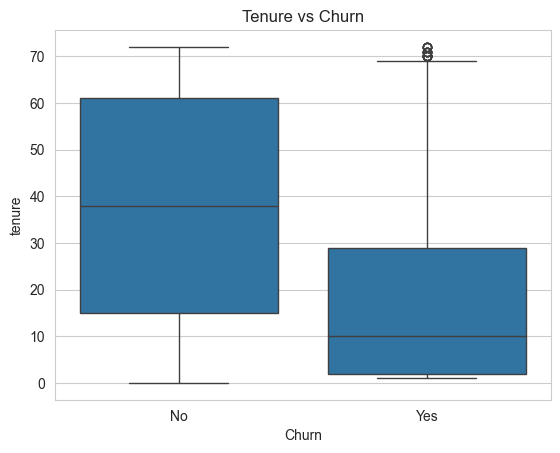

In [60]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

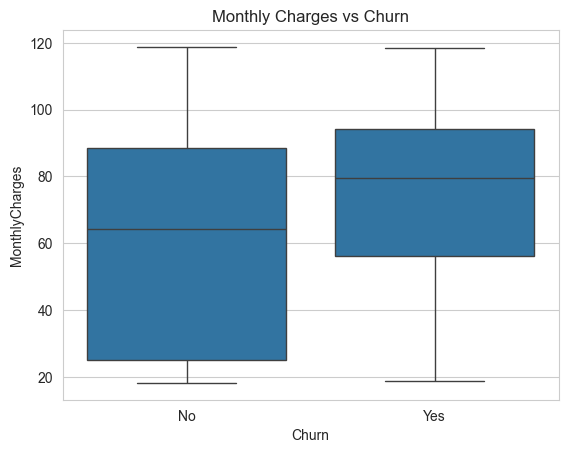

In [61]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

## Categorical Features and Churn

We now examine selected categorical features with strong semantic
interpretability to understand how customer characteristics and
contractual factors relate to churn behavior.

In [62]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


## Initial Observations and Hypotheses

Based on the exploratory analysis, several patterns emerge:

- Customers with shorter tenure are more likely to churn.
- Month-to-month contracts exhibit significantly higher churn rates
  compared to longer-term contracts.
- Higher monthly charges appear to be associated with increased churn.

These observations suggest that churn behavior is influenced by
both customer lifecycle factors and contractual conditions.
As a result, interpretable models such as logistic regression
and decision trees are well-suited for subsequent analysis.


Although the dataset contains many features, the EDA focuses on a subset of variables with high interpretability and information density.
The remaining features are incorporated during modeling, where their relevance is assessed quantitatively.